In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.dates as mdates
import scipy.stats as st
from datetime import datetime
%matplotlib inline 

In [2]:
#Read the file and load to the dataframe
df = pd.read_csv('re_data.csv', parse_dates=['First Payment Date', 'Maturity Date'])
df.head()

,First Payment Date,Maturity Date,Loan Amount,Zip,Property Value,Year Built,Net Operating Income,Effective Gross Income,Total Operating Expenses,Maintenance Expense,Parking Expense,Taxes Expense,Insurance Expense,Utilities Expense,Payroll Expense
0,2017-06-01,2022-05-01,2143864.02,60077.0,3003400.24,1965,153643.96,282027.80,125597.78,18793.51,4608.95,41580.76,9110.30,11233.91,12215.12
1,2017-06-01,2037-05-01,1445991.78,33441.0,1798349.3,1960,105282.69,180649.26,75213.72,14200.86,0.00,32705.82,13001.24,0.00,0.00
2,2017-06-01,2037-05-01,2725017.88,94597.0,1653153.29,1959,230180.51,305261.44,71830.08,11574.56,0.00,39049.76,3869.46,381.04,0.00
3,2017-07-01,2037-06-01,4203448.93,95670.0,7554077.66,1976,509272.80,890801.66,417618.92,82308.66,0.00,51614.93,11441.55,25899.44,104574.43
4,2017-06-01,2027-05-01,872183.47,90008.0,1306139.1,1952,68206.10,101021.26,34641.78,7161.38,0.00,11057.87,3008.81,6592.98,0.00


In [3]:
df.shape

(967, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 15 columns):
First Payment Date          952 non-null datetime64[ns]
Maturity Date               952 non-null datetime64[ns]
Loan Amount                 967 non-null float64
Zip                         955 non-null float64
Property Value              967 non-null object
Year Built                  944 non-null object
Net Operating Income        967 non-null float64
Effective Gross Income      967 non-null float64
Total Operating Expenses    967 non-null float64
Maintenance Expense         967 non-null float64
Parking Expense             967 non-null float64
Taxes Expense               967 non-null float64
Insurance Expense           967 non-null float64
Utilities Expense           967 non-null float64
Payroll Expense             967 non-null float64
dtypes: datetime64[ns](2), float64(11), object(2)
memory usage: 113.4+ KB


I would first prefer to do **Exploratory Analysis of the data, make it clean and usable before answering the questions**. Lets rename the column names to remove spaces and change datatype for few columns.

In [5]:
#Rename the columns to remove space
new_column_names =(['First_Payment_Date', 'Maturity_Date', 'Loan_Amount', 'Zip','Property_Value', 'Year_Built', 
                    'Net_Operating_Income','Effective_Gross_Income', 'Total_Operating_Expenses',
                    'Maintenance_Expense', 'Parking_Expense', 'Taxes_Expense', 'Insurance_Expense', 
                    'Utilities_Expense', 'Payroll_Expense'])
                   
df.columns = new_column_names

In [6]:
df.columns

Index(['First_Payment_Date', 'Maturity_Date', 'Loan_Amount', 'Zip',
       'Property_Value', 'Year_Built', 'Net_Operating_Income',
       'Effective_Gross_Income', 'Total_Operating_Expenses',
       'Maintenance_Expense', 'Parking_Expense', 'Taxes_Expense',
       'Insurance_Expense', 'Utilities_Expense', 'Payroll_Expense'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 15 columns):
First_Payment_Date          952 non-null datetime64[ns]
Maturity_Date               952 non-null datetime64[ns]
Loan_Amount                 967 non-null float64
Zip                         955 non-null float64
Property_Value              967 non-null object
Year_Built                  944 non-null object
Net_Operating_Income        967 non-null float64
Effective_Gross_Income      967 non-null float64
Total_Operating_Expenses    967 non-null float64
Maintenance_Expense         967 non-null float64
Parking_Expense             967 non-null float64
Taxes_Expense               967 non-null float64
Insurance_Expense           967 non-null float64
Utilities_Expense           967 non-null float64
Payroll_Expense             967 non-null float64
dtypes: datetime64[ns](2), float64(11), object(2)
memory usage: 113.4+ KB


In [8]:
# Check nulls in each column
df.isnull().sum()

First_Payment_Date          15
Maturity_Date               15
Loan_Amount                  0
Zip                         12
Property_Value               0
Year_Built                  23
Net_Operating_Income         0
Effective_Gross_Income       0
Total_Operating_Expenses     0
Maintenance_Expense          0
Parking_Expense              0
Taxes_Expense                0
Insurance_Expense            0
Utilities_Expense            0
Payroll_Expense              0
dtype: int64

# Handling NaN and missing values

+ There are **15 observations with null values in FirstPaymentDate and Maturaity date**. They have loan amount as 0. So, I can safely replace NaN with any default value. Lets use 2000-01-01 as default date.

+ There are **12 observations with Null Zip**. Most of the corresponding property_value and year_build is also NaN. So, we can drop **drop these observations.**

+ There is no NaN in property_value but there are 14 observations for which **value is set as 'Error**'. I assumed that these values are not available and **replaced 'error' with mean of the property value.** 

+ There are 23 NaN for year_build. Let's use **median to fill these NaN**. Few places 'Year_build' has two years separated with comma. I picked up the 1st year in these scenarios.

+ I also verified for the duplicates and **found no duplicates**.



In [9]:
# Fill the Nan date with default date as 2000-01-01 '
df['First_Payment_Date'] = df['First_Payment_Date'].fillna(pd.to_datetime('2000-01-01'))
df['Maturity_Date'] = df['Maturity_Date'].fillna(pd.to_datetime('2000-01-01'))
df[df.First_Payment_Date=='2000-01-01']

,First_Payment_Date,Maturity_Date,Loan_Amount,Zip,Property_Value,Year_Built,Net_Operating_Income,Effective_Gross_Income,Total_Operating_Expenses,Maintenance_Expense,Parking_Expense,Taxes_Expense,Insurance_Expense,Utilities_Expense,Payroll_Expense
17,2000-01-01,2000-01-01,0.0,46107.0,1434633.02,1973,279324.20,299338.99,11958.82,0.00,0.0,0.00,0.00,0.00,0.00
34,2000-01-01,2000-01-01,0.0,27103.0,0.0,NaN,884181.45,934362.56,37540.75,0.00,0.0,0.00,0.00,0.00,0.00
59,2000-01-01,2000-01-01,0.0,94117.0,3255248.75,1954,121955.91,172146.05,53158.02,17448.09,0.0,13258.43,4852.59,2374.02,0.00
97,2000-01-01,2000-01-01,0.0,75236.0,36475296.92,1985,2608926.48,5116603.64,2434783.16,280821.64,0.0,491018.21,79579.43,624440.71,691910.28
120,2000-01-01,2000-01-01,0.0,97116.0,3530125.48,1976,296549.42,310462.24,15315.42,0.00,0.0,0.00,0.00,0.00,0.00
135,2000-01-01,2000-01-01,0.0,80203.0,0.0,NaN,344853.79,352737.01,13810.99,0.00,0.0,0.00,0.00,0.00,0.00
138,2000-01-01,2000-01-01,0.0,23234.0,9131195.45,1968,444354.44,1109652.51,690688.69,163807.75,0.0,67621.77,65799.85,12701.07,145266.39
139,2000-01-01,2000-01-01,0.0,11216.0,2852104.2,1931,154502.94,166932.65,6415.59,0.00,0.0,0.00,0.00,0.00,0.00
181,2000-01-01,2000-01-01,0.0,78704.0,0.0,1952,491378.53,497601.87,20332.77,0.00,0.0,0.00,0.00,0.00,0.00
183,2000-01-01,2000-01-01,0.0,97448.0,9173461.76,1995,652028.45,1089995.98,416415.85,112133.84,0.0,110682.81,24318.07,5831.30,26614.84


In [10]:
#Drop the observations having Zip as null
df =df.dropna(subset=['Zip'])
df['Zip'] = df['Zip'].astype(np.int)
df.Zip.isnull().sum()

0

In [11]:
# Handling of Property_Value as 'Error' 
df.Property_Value.replace('Error', np.NaN, inplace=True) # Replace the 'Error with NaN
df['Property_Value'] = df['Property_Value'].astype(np.float64) # Change the datatype to float
df.Property_Value.fillna(df.Property_Value.mean(), inplace=True)#Impute the NaN with mean value
df.Property_Value.isnull().sum()

0

In [12]:
#Handling Null of Year Built
df['Year_Built']= df['Year_Built'].apply(lambda x: str(x)[:4] if x is not np.NaN else np.NaN)# choose the 1st year

In [13]:
df.Year_Built.fillna(df.Year_Built.median(), inplace=True)#Impute the NaN with median value
df['Year_Built'] = df['Year_Built'].astype(np.int) 
df.Year_Built.isnull().sum()

0

Let's check how the data distribution in 'Year_Built' looks like after imputing with median

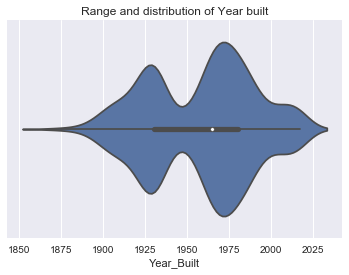

In [14]:
# Plot Violinplot of Year built
sns.violinplot(df.Year_Built)
plt.title('Range and distribution of Year built')

In [15]:
#df['Year_Built'] = df['Year_Built'].astype(np.int) 

In [16]:
# check for the duplicate observations
df.duplicated().sum()

0

# Handling repetitive values:

It seems there are many  0's in our dataset. Let's find out the **repetition of 0's **in each column. If any of the columns has more than 70% zeros, we can safely drop that column. This kind of data trend can be viewed on violinplot. 
    
**Parking_Expense has 85% of data as 0**. So, I decided to drop this feature.

In [17]:
# Calculate the repetition of 0 in each column
perct_0  = {column: '%2.2f' % (((df[column] == 0).sum()/df.shape[0])*100)+'%' for column in df.columns if df[column].dtype == np.float64}
perct_0 

{'Effective_Gross_Income': '1.05%',
 'Insurance_Expense': '3.66%',
 'Loan_Amount': '14.66%',
 'Maintenance_Expense': '3.66%',
 'Net_Operating_Income': '1.05%',
 'Parking_Expense': '84.92%',
 'Payroll_Expense': '18.12%',
 'Property_Value': '1.68%',
 'Taxes_Expense': '4.08%',
 'Total_Operating_Expenses': '1.26%',
 'Utilities_Expense': '4.29%'}

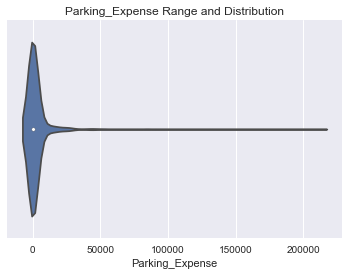

In [18]:
sns.violinplot(df.Parking_Expense)
sns.plt.title('Parking_Expense Range and Distribution')

In [19]:
df= df.drop(['Parking_Expense'], axis=1)
df.shape

(955, 14)

In [20]:
df['Property_Age'] = 2017-df['Year_Built']

Our data is in clean state now. I saved it as a CSV file and will pick-up  to start with further tasks. 

In [21]:
#Save the cleanData for next steps
df.to_csv('data_clean.csv',index=False)